# **Project: Providing data-driven suggestions for HR**

## Description and deliverables

In this project we analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, we will have two artifacts:
1. A brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. 
2. A regression model 
3. A machine learning model to predict whether or not an employee will leave the company.

Deliverables:
1. Model evaluation (and interpretation if applicable)
2. Data visualization(s) directly related to the question we ask
3. Ethical considerations
4. The resources used to troubleshoot and find answers or solutions.


# **PACE stages**


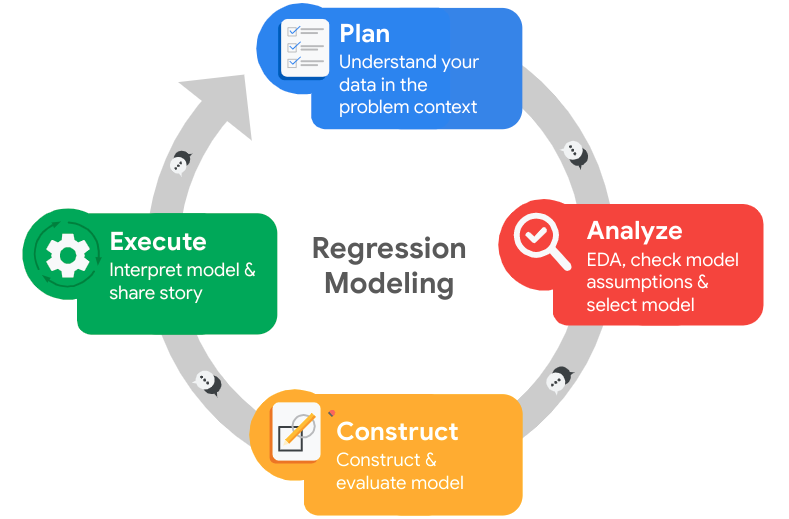

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** we don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are our stakeholders for this project?
- What are we trying to solve or accomplish?
- What are our initial observations when we explore the data?
- What resources do we find ourselves using as we complete this stage? (including the links.)
- Do you have any ethical considerations in this stage?




-The Board of Directors, the CXOs and the Hr department are the stakeholders for this sproject.

-Determine what makes an employee leaves the company.
 Predict who will leave the company



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [57]:
# Import packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.** 

In [58]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
df0.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand our variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [60]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [61]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, we will rename the columns as needed. We will also standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [62]:
# Display all column names
print(list(df0.columns))

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [63]:
# Rename columns as needed
# We will use the snake format
def to_snake_case(name):
    # Replace spaces with underscores and convert to lowercase
    s1 = re.sub(' ', '_', name)
    # Insert underscores between words (i.e., before upper case letters)
    s2 = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', s1)
    # Convert to lower case
    return s2.lower()

# Display all column names after the update
df0.columns = [to_snake_case(col) for col in df0.columns]
print(list(df0.columns))

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years', 'department', 'salary']


### Check missing values

Check for any missing values in the data.

<Axes: >

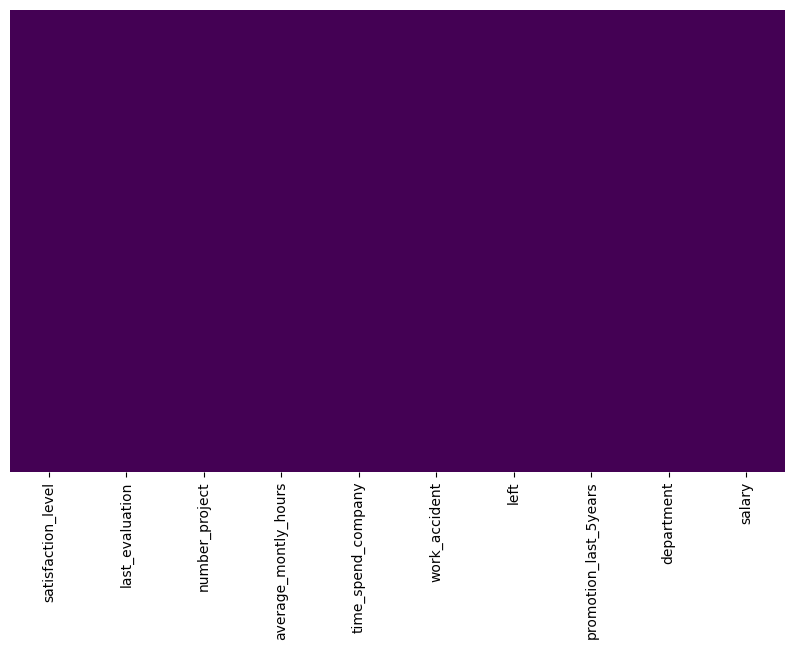

In [64]:
# We will check missing values highlighting them in a plot
plt.figure(figsize=(10,6))
sns.heatmap(df0.isna(), cbar=False, cmap='viridis', yticklabels=False)

No missing values detected visually

In [65]:
# Double-check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Double checking no missing values detected 

### Check duplicates

Check for any duplicate entries in the data.

In [66]:
# Check for duplicates
duplicates = df0.duplicated(keep='first')

# df0.groupby('is_duplicate')
counts = duplicates.value_counts()
print(counts)

False    11991
True      3008
Name: count, dtype: int64


In [67]:
# Inspect some rows containing duplicates as needed
# df0[df0.duplicated(keep='first')].head()
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [68]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The first five occurences of rows that are duplicated farther down in the dataframe are shown. Are they legitimate entries? How likely is it that two employees self-reported the exact same response for every column?

We could perform a likelihood analysis by applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but it does not looks necessary. As we have several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. So, We will drop them.

### Check outliers

Check for outliers in the data.

Minimum:2.00
Mean:3.50
Median:3.00
Mode:3.00
Maximum:10.00
Standard Deviation:1.46



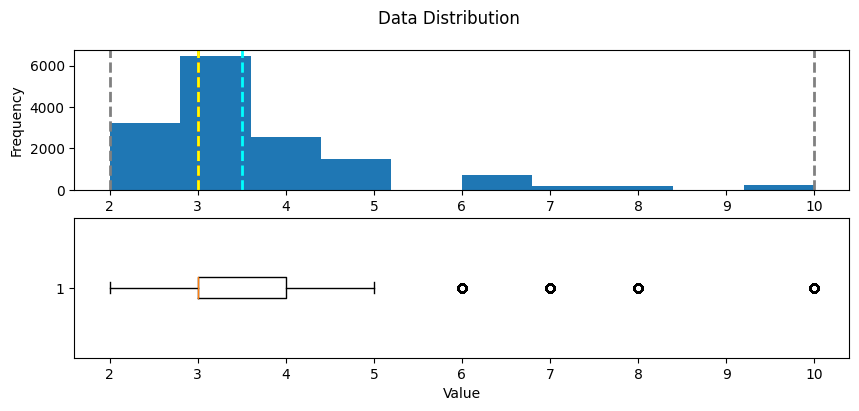

In [69]:
# Boxplot to visualize distribution of `tenure` and detect any outliers

# We create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    std_val = var_data.std()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\nStandard Deviation:{:.2f}\n'.format(min_val,
                                                                                                                        mean_val,
                                                                                                                        med_val,
                                                                                                                        mod_val,
                                                                                                                        max_val,
                                                                                                                        std_val))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()
show_distribution(df0['time_spend_company'])

In [70]:
# Determine the number of rows containing outliers

# Replacing 'threshold' with our threshold number of standard deviations
column = df0['time_spend_company']
mean = column.mean()
std_dev = column.std()
threshold = 2  # Example threshold

# Creating a mask for outliers
outlier_mask = (column < (mean - threshold * std_dev)) | (column > (mean + threshold * std_dev))

# Counting the outliers
number_of_outliers = outlier_mask.sum()

print("Number of outliers: ", number_of_outliers)

# Filter out the outliers
df1 = df0[(column >= (mean - threshold * std_dev)) & (column <= (mean + threshold * std_dev))]
print('Rows with Outliers: {}'.format(df0.shape[0]))
print('Rows without Outliers: {}'.format(df1.shape[0]))

Number of outliers:  564
Rows with Outliers: 14999
Rows without Outliers: 14435


In [71]:
df1.shape

(14435, 10)

Minimum:2.00
Mean:3.31
Median:3.00
Mode:3.00
Maximum:6.00
Standard Deviation:1.08



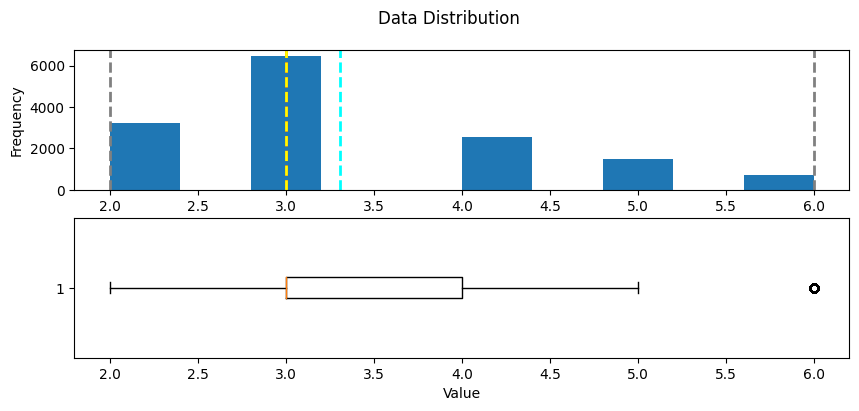

In [72]:
show_distribution(df1['time_spend_company'])

Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, we should consider whether to remove outliers, based on the type of model we decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Lets's reflect on these questions as we complete the analyze stage.

- What did we observe about the relationships between variables?
- What do we observe about the distributions in the data?
- What transformations did we make with our data? Why did we chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do we use as we complete this stage? (Including the links.)
- Do we have any ethical considerations in this stage?

[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

75.26% stayed
24.74% left


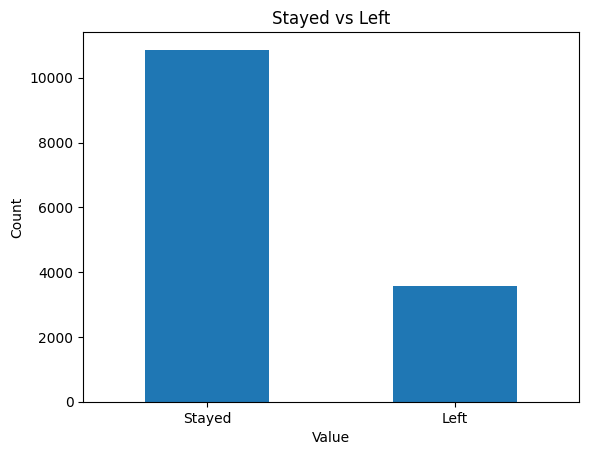

In [73]:
# Get numbers of people who left vs. stayed

# Count the True and False values
value_counts = df1['left'].value_counts()
print("{:.2f}% stayed".format(value_counts[0]/df1['left'].shape[0]*100))
print("{:.2f}% left".format(value_counts[1]/df1['left'].shape[0]*100))

# Get percentages of people who left vs. stayed

value_counts.plot(kind='bar')
plt.title('Stayed vs Left')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stayed','Left'], rotation=0)  # Set the x-ticks to True and False
plt.show()

### Data visualizations

Now, examine variables that w're interested in, and create plots to visualize relationships between variables in the data.

In [74]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [75]:
# Let's create two variables to hold the names of the numerical and categorical variables:

# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df1.dtypes[df1.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df1.dtypes[df1.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  8
Number of Categorical features:  2


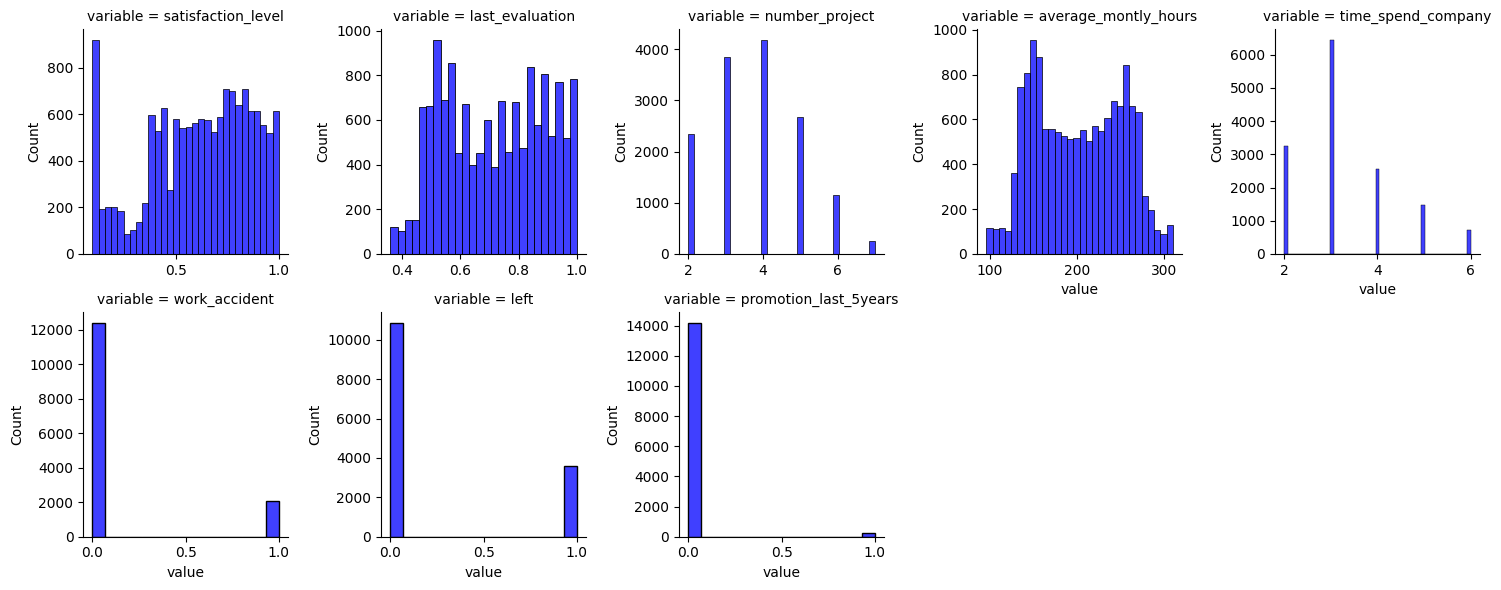

In [76]:
# We use the melt() method from pandas to reshape our DataFrame. 
# We may want to view the reshaped data after using the melt() method to understand how the DataFrame is arranged.

melt_num_features = pd.melt(df1, value_vars=numerical_features)

grid = sns.FacetGrid(melt_num_features, col="variable", col_wrap=5, sharex=False, sharey=False)
grid = grid.map(sns.histplot, "value", color="blue") 

In [77]:
# The pd.melt() function is part of the pandas library and is used for transforming or reshaping data. 
# Let's break down what each part of this function is doing in this context:

# DataFrame (df1): It contains data in a 'wide' format, meaning each column is a separate variable and each row is an observation.
# value_vars=numerical_features: This parameter specifies the subset of columns in df1 that you want to 'melt'. 
# In this case, numerical_features is expected to be a list of column names in df1. These columns are the ones that you're focusing on, 
# and they should be numerical in nature since we're planning to create histograms for them later.

# The pd.melt() function will transform these columns in the following way:

# Consolidating Column Names: The names of the columns specified in numerical_features become values in a new column called 'variable'.

# Consolidating Data: The data from these columns are all gathered into a single column called 'value'. 
# Each row in this column corresponds to a value from one of the columns listed in numerical_features.

# The resulting DataFrame, melt_num_features, will have two columns:

# 'variable': This column contains what were originally the column names in df1. 
# Each row in this column indicates the source column (from df1) of the corresponding value in the 'value' column.

# 'value': This column contains all the data values from the columns listed in numerical_features. Each row corresponds to a value from one of these columns.

# In summary, pd.melt() takes the specified numerical columns from df1 and collapses them into a long format DataFrame. 
# This format is particularly useful for creating plots like histograms for each numerical feature, 
# as it makes it easy to iterate over each feature and plot its values, which is what the subsequent sns.FacetGrid part of the code does. 
# This transformation is often used in data visualization to convert a DataFrame from a format suitable for analysis (wide format) to 
# a format suitable for plotting (long format).

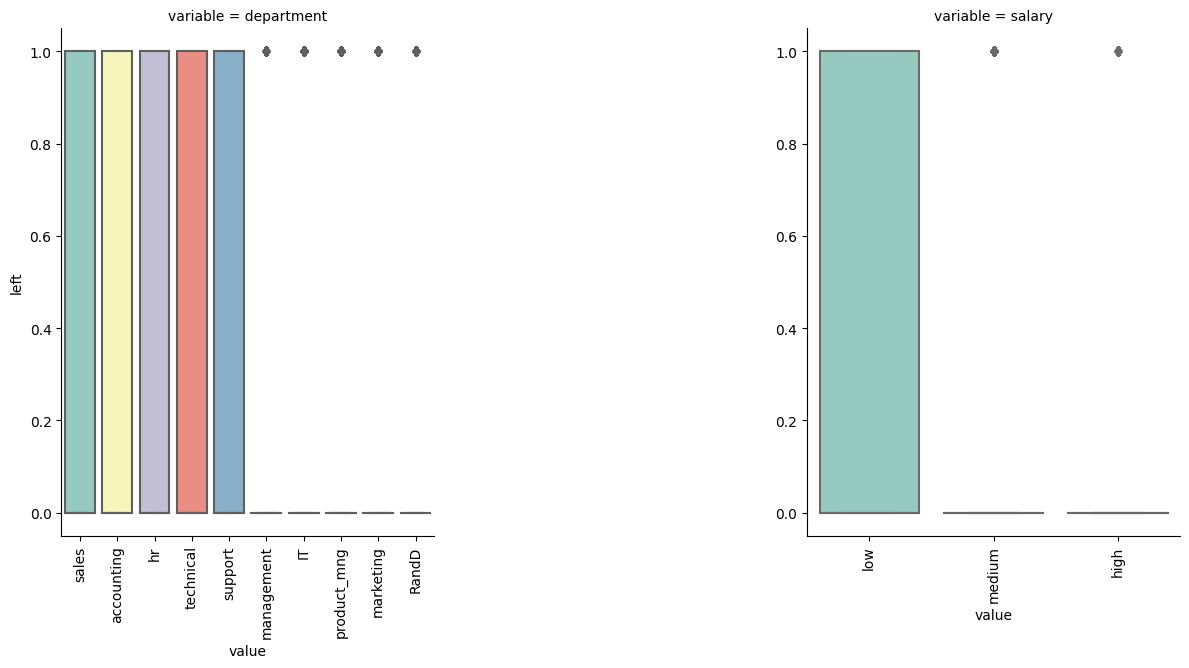

In [78]:
# Now, we use the categorical_features variable to plot the distribution of "left/stay" dependent variable by each categorical variable:

melt_cat_features = pd.melt(df1, id_vars=['left'], value_vars=categorical_features)
# we used the seaborn library to plot our charts. We also introduced the melt() function from pandas, 
# which can be used to reshape our DataFrame and feed it to the FacetGrid() function of the seaborn library.

grid = sns.FacetGrid(melt_cat_features, col="variable", col_wrap=2, sharex=False, sharey=False, height=6)
grid.map(sns.boxplot, "value", "left", palette="Set3")
grid.fig.subplots_adjust(wspace=1, hspace=0.25)

for ax in grid.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=90)

# Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

Encode  'salary' to Integer value

In [79]:
salary_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}

# Step 2: Apply the mapping
df0['salary'] = df0['salary'].map(salary_mapping)
# df0['salary'] = df0['salary'].map(salary_mapping).astype(int)
df1['salary'] = df1['salary'].map(salary_mapping)

In [80]:
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [81]:
df0['salary'].describe()

count    14999.000000
mean         1.594706
std          0.637183
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: salary, dtype: float64

In [82]:
df0.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2


In [83]:
df1.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2


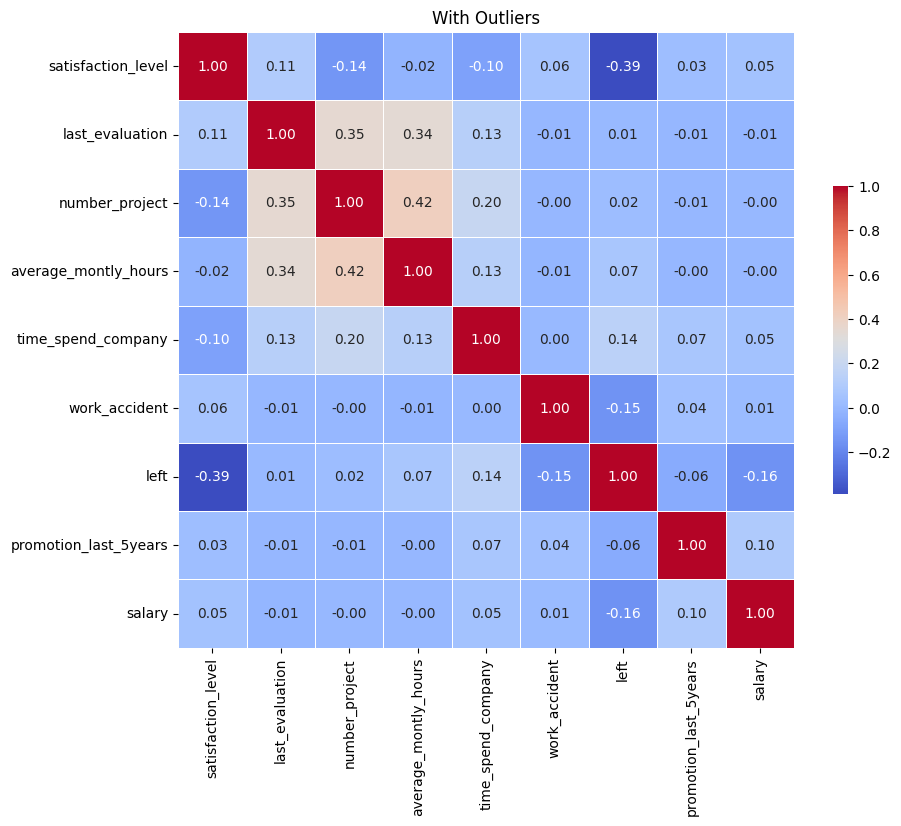

In [84]:
# Create a plot as needed

# Calculate the correlation matrix without categorical features
corr = df0.drop('department', axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
plt.title("With Outliers")

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

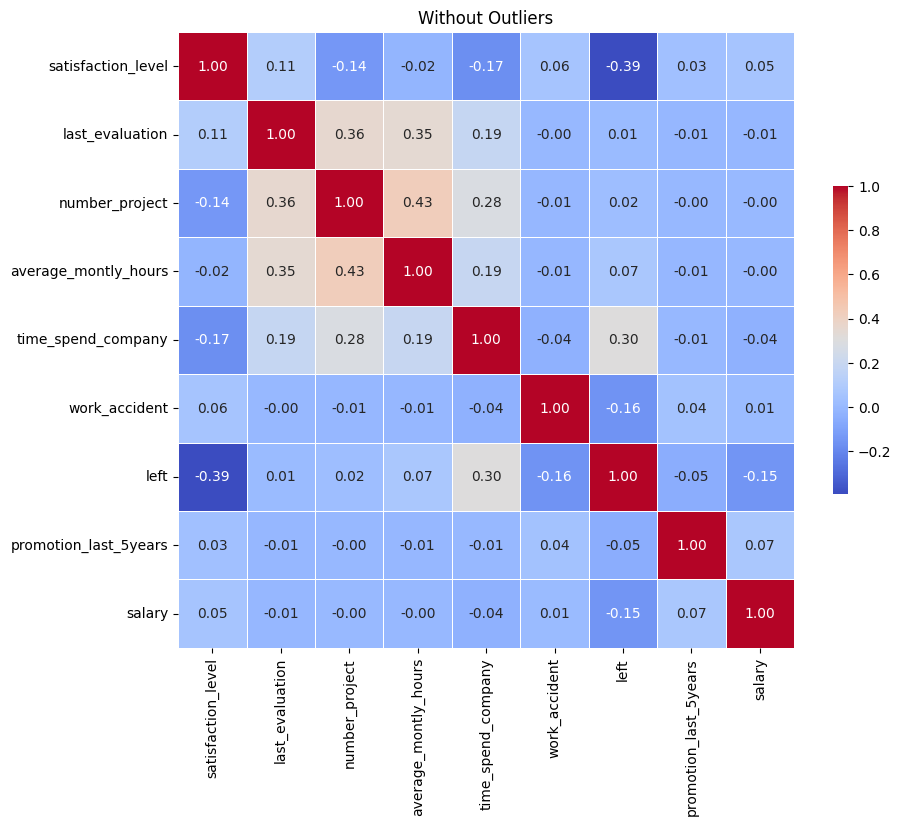

In [85]:
# Create a plot as needed
# Calculate the correlation matrix without categorical features
corr = df1.drop('department', axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
plt.title("Without Outliers")

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

<Axes: >

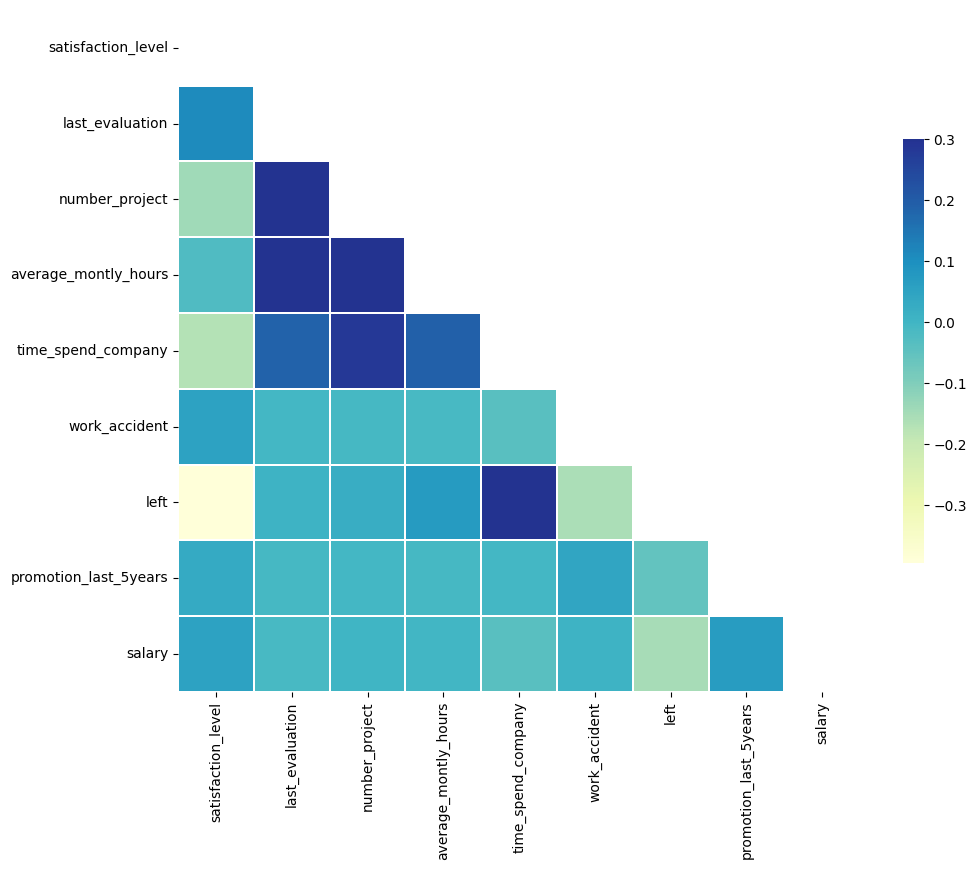

In [86]:
# Create a plot as needed
mask = np.zeros_like(corr, dtype=np.bool_)
# print(mask)
# print("\n")
# We create a tuple with triu_indices_from() by passing the "mask" array
# k is used to offset diagonal
# with k=0, we offset all diagnoals
# If we put k=13, means we offset 14-13=1 diagonal 

# triu_indices_from() Return the indices for the upper-triangle of arr.
mask[np.triu_indices_from(mask, k=0)] = True
# print(mask)

# Setting the plot size
fig, axis = plt.subplots(figsize=(11, 11))

# cbar_kws={"shrink": 0.5} is shrinking the legend color bar
sns.heatmap(corr,  mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": 0.5})

### Insights

It seems that inadequate management is causing employees to depart from the organization. Departures are linked to extended working hours, numerous projects, and overall reduced job satisfaction. Working long hours without receiving promotions or favorable performance evaluations can be disheartening. There is a significant portion of the company's workforce that may be experiencing burnout. Additionally, it seems that employees who have been with the company for more than six years are less likely to resign. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification

### Identify the types of models most appropriate for this task.

Random Forest

### Modeling

Add as many cells as you need to conduct the modeling process.

In [87]:
train_data = df1.drop('left', axis=1)  # features

In [88]:
train_data.shape

(14435, 9)

#### Scaling Numeric Variables

In [89]:
# create a variable to hold the names of the data types viz int16, in32 and so on
num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter out variables with numeric data types
train_data_numcols_only = train_data.select_dtypes(include=num_cols)
# print(train_data_numcols_only)

In [90]:
# Importing MinMaxScaler and initializing it
min_max=MinMaxScaler()

# Scaling down the numeric variables
# We exclude SalePrice using iloc() on train_numcols_only data frame
train_data_numcols = pd.DataFrame(min_max.fit_transform(train_data_numcols_only.iloc[:,0:train_data_numcols_only.shape[1]]), 
                                  columns=train_data_numcols_only.iloc[:,0:train_data_numcols_only.shape[1]].columns.tolist())

In [91]:
train_data_numcols.shape

(14435, 8)

#### Perform one-hot encoding on our categorical variables

In [92]:
# We exclude all numeric columns
train_data_catcol = train_data.select_dtypes(exclude=num_cols)
# print(train_data_catcol.shape)
# Steps to one-hot encoding:
# - We iterate through each categorical column name
# - Create encoded variables for each categorical columns
# - Concatenate the encoded variables column to the data frame
# - Remove the original categorical variable column
for col in train_data_catcol.columns.values:
    one_hot_encoded_variables = pd.get_dummies(train_data_catcol[col], prefix=col)
    train_data_catcol = pd.concat([train_data_catcol, one_hot_encoded_variables], axis=1)
    train_data_catcol.drop([col],axis=1, inplace=True)


In [93]:
train_data_catcol.shape

(14435, 10)

In [94]:
# Align the DataFrames: Make sure that both train_data_numcols and train_data_catcol have the same indices. 
# Reset the index of both DataFrames before concatenating them:
train_data_numcols.reset_index(drop=True, inplace=True)
train_data_catcol.reset_index(drop=True, inplace=True)

# We have now created a DataFrame with only numeric variables that have been scaled. 
# We have also created a DataFrame with only categorical variables that have been encoded. 
# Let's combine the two DataFrames into a single DataFrame:
X = pd.concat([train_data_numcols, train_data_catcol], axis=1)
y = df1['left']  # target
y.reset_index(drop=True, inplace=True)

print(X.shape)
print(y.shape)

(14435, 18)
(14435,)


In [95]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.318681,0.265625,0.0,0.285047,0.25,0.0,0.0,0.0,False,False,False,False,False,False,False,True,False,False
1,0.780220,0.781250,0.6,0.775701,1.00,0.0,0.0,0.5,False,False,False,False,False,False,False,True,False,False
2,0.021978,0.812500,1.0,0.822430,0.50,0.0,0.0,0.5,False,False,False,False,False,False,False,True,False,False
3,0.692308,0.796875,0.6,0.593458,0.75,0.0,0.0,0.0,False,False,False,False,False,False,False,True,False,False
4,0.307692,0.250000,0.0,0.294393,0.25,0.0,0.0,0.0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14430,0.340659,0.328125,0.0,0.257009,0.25,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,False
14431,0.307692,0.187500,0.0,0.299065,0.25,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,False
14432,0.307692,0.265625,0.0,0.219626,0.25,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,False
14433,0.021978,0.937500,0.8,0.859813,0.50,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,False


In [96]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14430    1
14431    1
14432    1
14433    1
14434    1
Name: left, Length: 14435, dtype: int64

In [97]:
# First split into training and temp (the combination of validation and testing)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Split the temp set into validation and testing sets
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# We now have X_train, X_val, X_test, y_train, y_val, y_test


### Random Forect Classifier

In [98]:
# Create the Random Forest model
# You can adjust the parameters like n_estimators, max_depth, etc.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
# Validate the model
# y_val_pred = rf_model.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy}")

# Test the model
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}\nTest Precision: {test_precision}\nTest Recall: {test_recall}\nTest F1: {test_f1}")



Test Accuracy: 0.9857984066505022
Test Precision: 0.9915134370579916
Test Recall: 0.9524456521739131
Test F1: 0.9715869715869717


### Confusion Matrix Random Forest

In [99]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

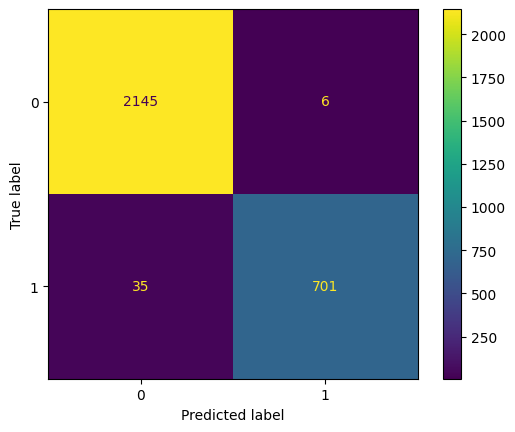

In [100]:
conf_matrix_plot(rf_model, X_test, y_test)

### XGboost Classifier

In [101]:
# Create the XGBoost model
# We can adjust the parameters like max_depth, learning_rate, n_estimators, etc.
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Test the model
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}\nTest Precision: {test_precision}\nTest Recall: {test_recall}\nTest F1: {test_f1}")

Test Accuracy: 0.9715968133010046
Test Precision: 0.9684813753581661
Test Recall: 0.9184782608695652
Test F1: 0.9428172942817293


### Confusion Matrix XGboost

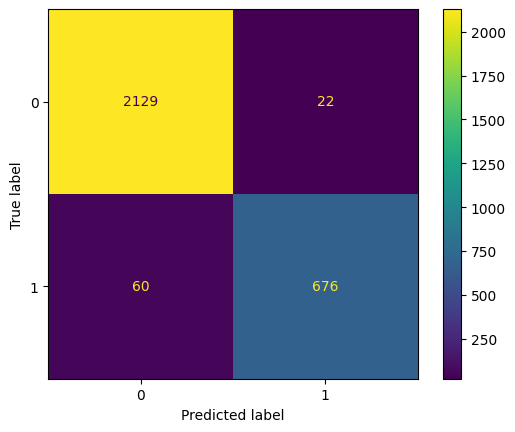

In [102]:
conf_matrix_plot(xgb_model, X_test, y_test)

### Explain varibles using feature importance

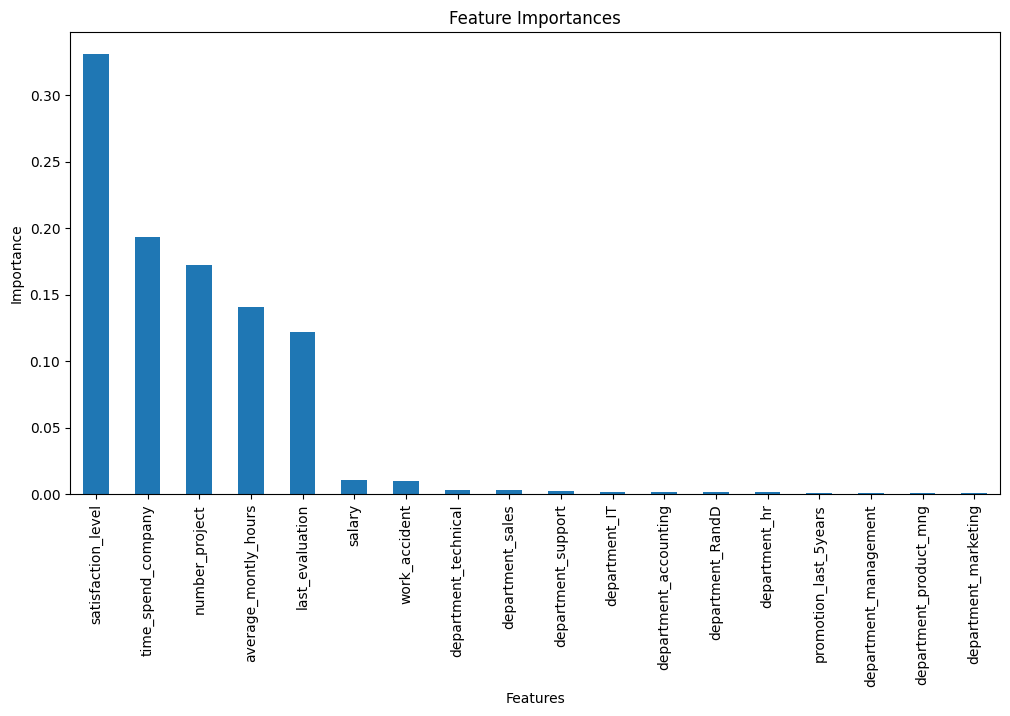

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you've already trained a RandomForestClassifier named rf_model
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
feature_importances['importance'].plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


In [104]:
# !pip install shap
# !pip install numba
# !pip install --upgrade numba

### Explain variables using SHAP

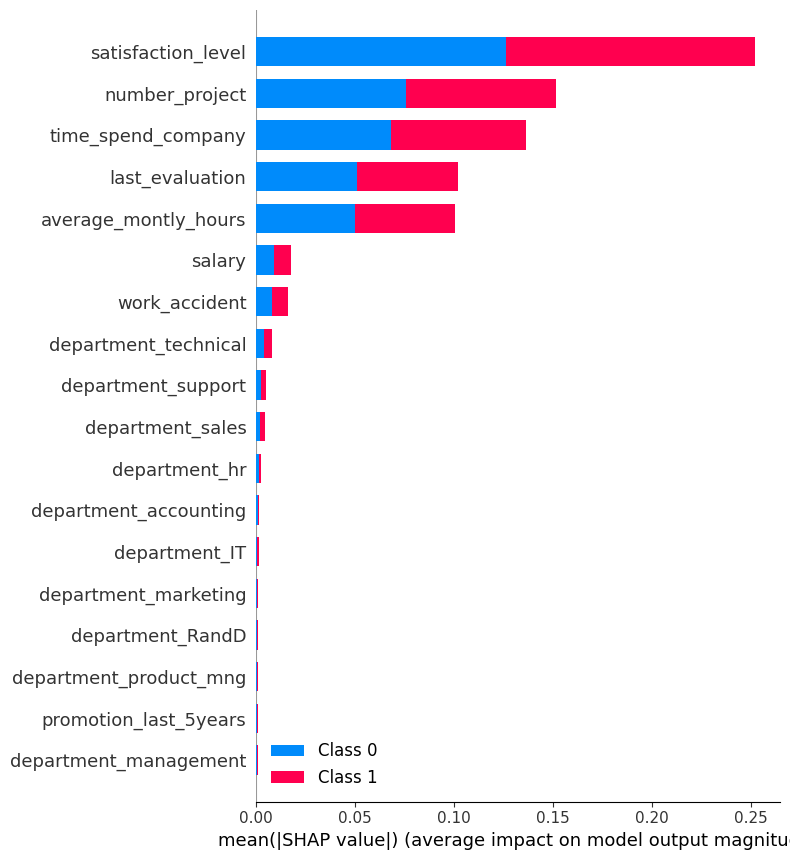

In [105]:
import shap

# Create a SHAP Explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")


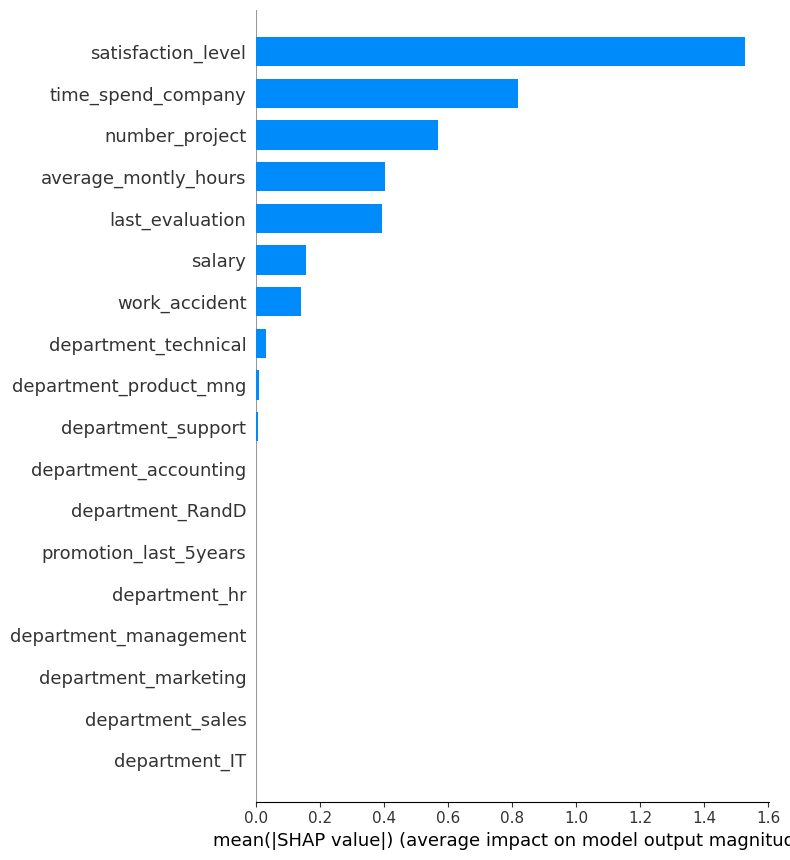

In [106]:
# Create a SHAP Explainer for XG_Boost

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")

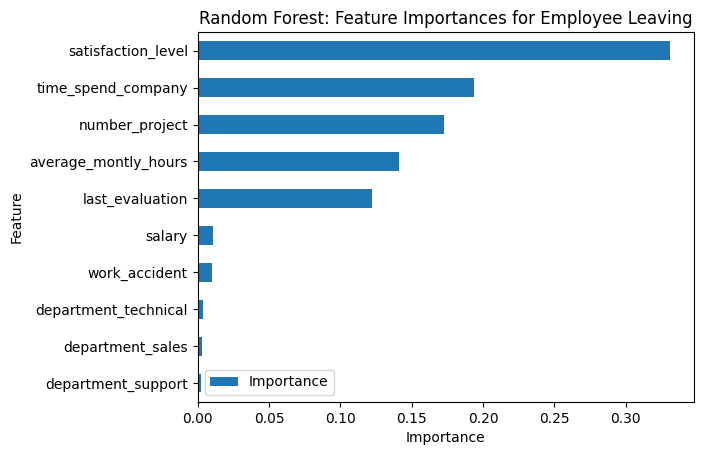

In [107]:
# Get feature importances
feat_impt = rf_model.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_model.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

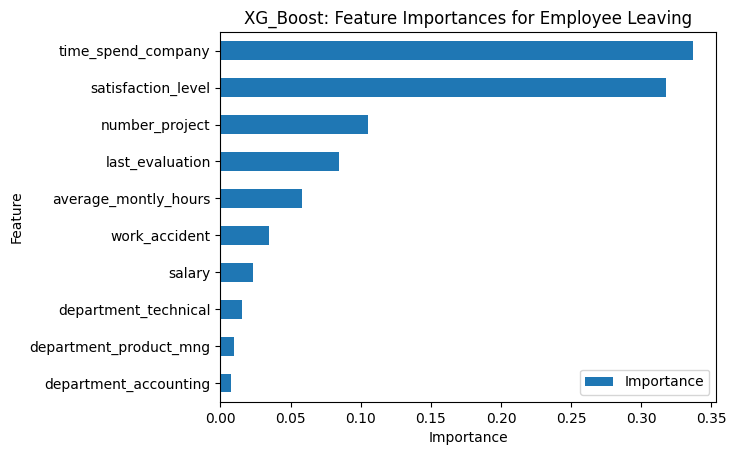

In [108]:
# Get feature importances
feat_impt = xgb_model.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(xgb_model.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("XG_Boost: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plots above shows that in this random forest model,  `satisfaction_level`, `time_spend_company`, `number_project`, `average_monthly_hours`, and `last_evaluation` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the XGBoost model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Random Forest**

The Random Forest model achieved an accuracy of 98.57% precision of 99.15%, recall of 95.24%, f1-score of 97.15% (all weighted averages), on the test set.

**XGBoost**

The XGBoost precision obtained was 97.16%, precision of 96.84%, recall of 91.84%, f1-score of 94.28% (all weighted averages), on the test set.

**`The Random Forest outperformed the XGBoost model.`**

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

We could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 